In [1]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("naml_exams"):
    os.chdir("..")

# Exercise 1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars, belonging to three different customer segments. The analysis determined the quantities of 13 constituents found in each of the three types of wines.


In [4]:
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",
    header=None,
)
A = (
    np.array(data)[:, 1:].astype(np.float64).T
)  # matrix containing the data (num features x num wines)
labels = np.array(data)[:, 0].astype(
    np.int32
)  # the label of each wine (i.e. customer segment)
groups = (
    1,
    2,
    3,
)  # customer segments: 1 = low quality; 2 = medium quality; 3 = high quality
features = [
    "Alcohol",
    "Malic_Acid",
    "Ash",
    "Ash_Alcanity",
    "Magnesium",
    "Total_Phenols",
    "Flavanoids",
    "Nonflavanoid_Phenols",
    "Proanthocyanins",
    "Color_Intensity",
    "Hue",
    "OD280",
    "Proline",
]  # features descriptions
A.shape

(13, 178)

How many features? How many samples? How many samples belong to each customer segment?


In [5]:
A_samples = A.T  # shape: (178, 13)

# Filter by customer segments using labels
A_segment1 = A_samples[labels == 1]  # low quality
A_segment2 = A_samples[labels == 2]  # medium quality
A_segment3 = A_samples[labels == 3]  # high quality

# Print shapes (i.e., number of samples per segment)
print(f"Segment 1 (low quality): {A_segment1.shape[0]} samples")
print(f"Segment 2 (medium quality): {A_segment2.shape[0]} samples")
print(f"Segment 3 (high quality): {A_segment3.shape[0]} samples")

Segment 1 (low quality): 59 samples
Segment 2 (medium quality): 71 samples
Segment 3 (high quality): 48 samples


Normalize the data so that each feature has zero mean and unitary standard deviation.


In [9]:
A_mean = np.mean(A, axis=1)
A_std = np.std(A, axis=1)
A_normalized = (A - A_mean[:, None]) / A_std[:, None]

Perform PCA on the dataset by means of the SVD decomposition. Then, plot the trend of singular values,cumulative fraction of singular values and explained variance.


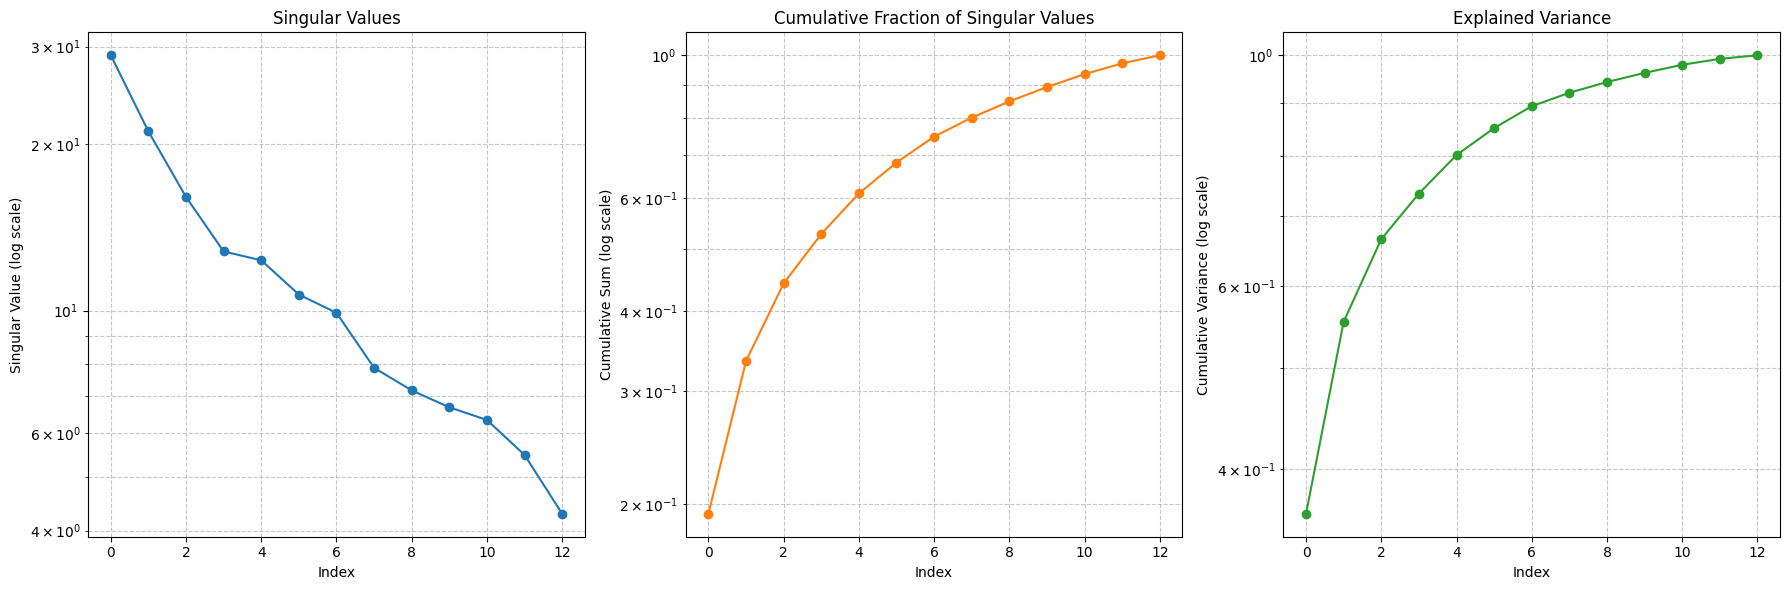

In [10]:
U, s, VT = np.linalg.svd(A_normalized, full_matrices=False)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Singular values plot
axs[0].semilogy(s, "o-", color="tab:blue")
axs[0].set_title("Singular Values")
axs[0].set_xlabel("Index")
axs[0].set_ylabel("Singular Value (log scale)")
axs[0].grid(True, which="both", linestyle="--", alpha=0.7)

# Cumulative fraction of singular values
cumulative_fraction = np.cumsum(s) / np.sum(s)
axs[1].semilogy(cumulative_fraction, "o-", color="tab:orange")
axs[1].set_title("Cumulative Fraction of Singular Values")
axs[1].set_xlabel("Index")
axs[1].set_ylabel("Cumulative Sum (log scale)")
axs[1].grid(True, which="both", linestyle="--", alpha=0.7)

# Explained variance (from squared singular values)
explained_variance = np.cumsum(s**2) / np.sum(s**2)
axs[2].semilogy(explained_variance, "o-", color="tab:green")
axs[2].set_title("Explained Variance")
axs[2].set_xlabel("Index")
axs[2].set_ylabel("Cumulative Variance (log scale)")
axs[2].grid(True, which="both", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

The first few singular values are typically much larger than the rest, indicating that most variance is captured by just a few principal components.

The cumulative singular value ratio shows how quickly the singular values "add up" often 2–3 components capture a large portion of the signal strength.

The explained variance plot tells you how many principal components are needed to retain most of the data variability (e.g., 95%).

Example:
For the Wine dataset, you'll often see:

~2 components explain over 80% of the variance

~3 components explain over 90%


Compute a matrix containing the principal components associated with the dataset.


In [11]:
Phi = np.matmul(U.transpose(), A_normalized)
Phi.shape

(13, 178)

Generate a scatterplot of the first two principal components of the dataset, grouped by label. Draw a line that separates, as well as you manage, the category of low customer segment wines from the rest of the wines (chose intercept and slope of the line by hand, trying to achieve a good result).


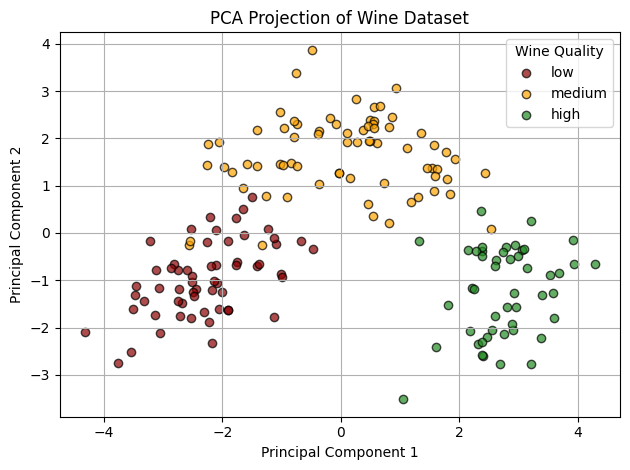

In [17]:
# Define intuitive colors and labels for wine quality
label_map = {
    1: ("darkred", "low"),
    2: ("orange", "medium"),
    3: ("forestgreen", "high"),
}

# Scatter plot of PCA results
for label, (color, text_label) in label_map.items():
    indices = [i for i, lab in enumerate(labels) if lab == label]
    plt.scatter(
        Phi[0, indices],
        Phi[1, indices],
        c=color,
        label=text_label,
        alpha=0.7,
        edgecolors="k",
    )

# Labels and grid
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Wine Dataset")
plt.legend(title="Wine Quality")
plt.grid(True)
plt.tight_layout()
plt.show()


We choose the line with $m = -0.875$ and $q=-0.75$


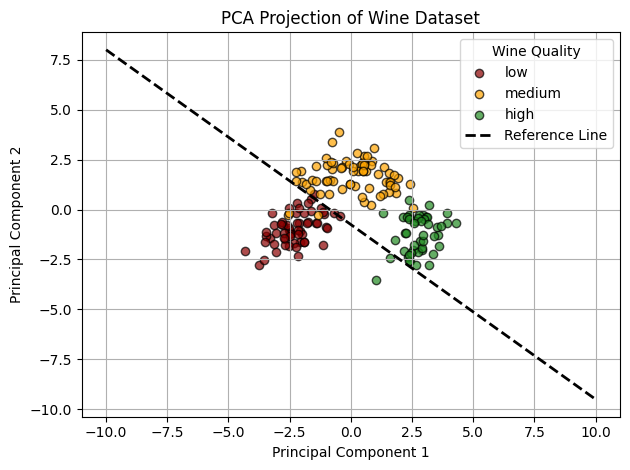

In [ ]:
# Define intuitive colors and labels for wine quality
label_map = {
    1: ("darkred", "low"),
    2: ("orange", "medium"),
    3: ("forestgreen", "high"),
}

# Scatter plot of PCA results
for label, (color, text_label) in label_map.items():
    indices = [i for i, lab in enumerate(labels) if lab == label]
    plt.scatter(
        Phi[0, indices],
        Phi[1, indices],
        c=color,
        label=text_label,
        alpha=0.7,
        edgecolors="k",
    )

# Define the line from y = mx + q
m = -0.875
q = -0.75
x_vals = np.linspace(-10, 10, 200)
y_vals = m * x_vals + q
plt.plot(
    x_vals, y_vals, color="black", linestyle="--", linewidth=2, label="Reference Line"
)

# Labels and grid
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Wine Dataset")
plt.legend(title="Wine Quality")
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# Convert true labels to binary: 1 if low quality, else 0
true_labels = (labels == 1).astype(int)

# Extract first two principal components
x_pca = Phi[0, :]
y_pca = Phi[1, :]

# Compute predicted labels: 1 if above the line, else 0
m = -0.875
q = -0.75
predicted_labels = (y_pca < m * x_pca + q).astype(int)

# Define "not low" as medium or high quality: labels 2 or 3
not_low_mask = np.logical_or(labels == 2, labels == 3)

# True Positives: predicted low and truly low
TP = np.sum((predicted_labels == 1) & (true_labels == 1))

# False Positives: predicted low but truly not low
FP = np.sum((predicted_labels == 1) & (not_low_mask))

# True Negatives: predicted not low and truly not low
TN = np.sum((predicted_labels == 0) & (not_low_mask))

# False Negatives: predicted not low but truly low
FN = np.sum((predicted_labels == 0) & (true_labels == 1))

# Compute metrics
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
accuracy = (TP + TN) / (TP + TN + FP + FN)

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)
print("\nSensitivity (Recall): {:.3f}".format(sensitivity))
print("Specificity: {:.3f}".format(specificity))
print("Accuracy: {:.3f}".format(accuracy))


True Positives (TP): 57
False Positives (FP): 5
True Negatives (TN): 114
False Negatives (FN): 2

Sensitivity (Recall): 0.966
Specificity: 0.958
Accuracy: 0.961


# Exercise 2


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp


Consider the minimization of the 2D quadratic function:

$$
f(\mathbf{x}) = {1 \over 2}(x_1^2 + \eta x^2_2) \tag{2}
$$

where $\mathbf{x} = (x_1, x_2)$ and $\eta > 0$


Use the contourf command to plot the contourlines of the function for different values of $\eta$


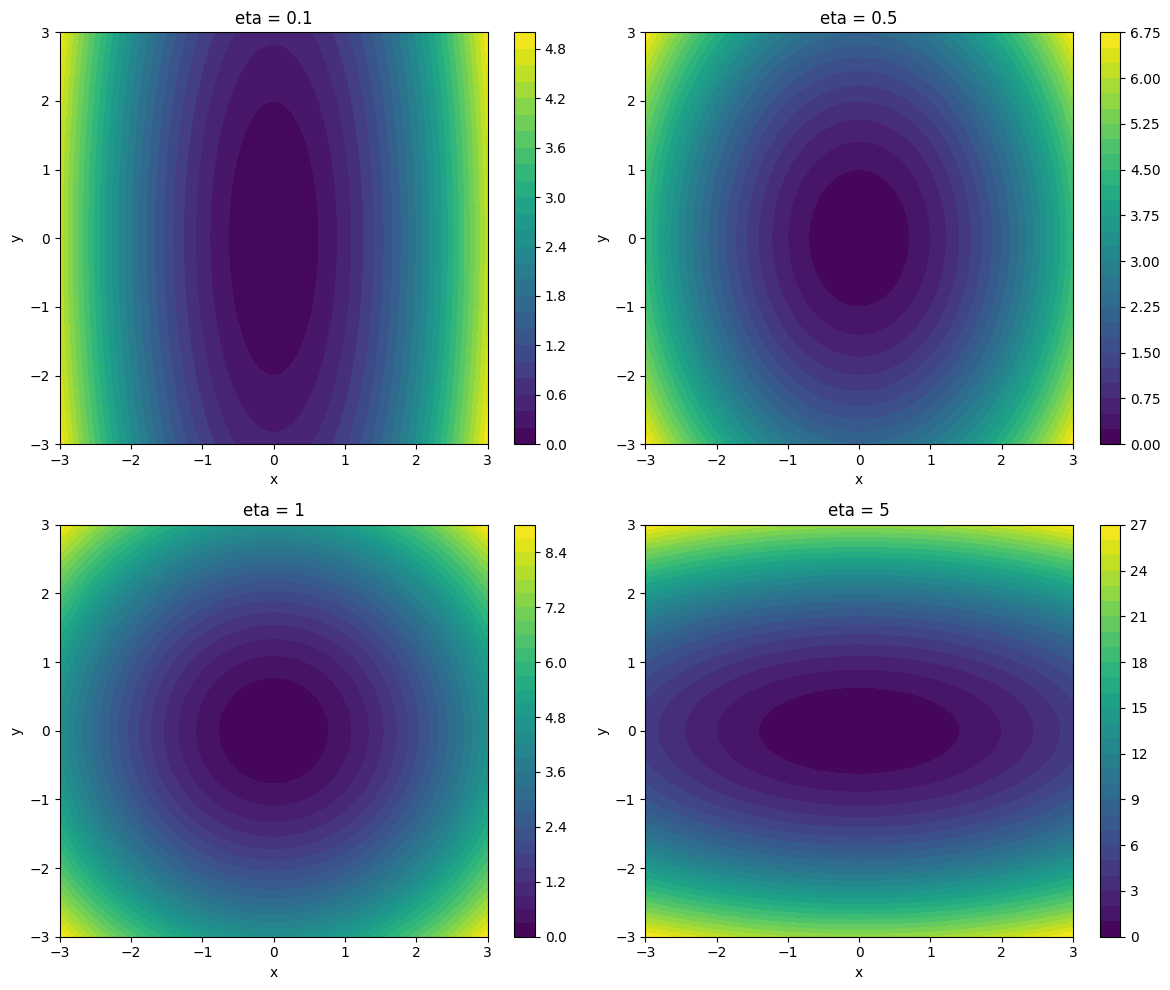

In [ ]:
# Parameters
xmin, xmax, Nx = -3, 3, 100
ymin, ymax, Ny = -3, 3, 100
etas = [0.1, 0.5, 1, 5]  # different eta values to plot
Ncontour = 30  # number of contour levels

# Create grid
x = np.linspace(xmin, xmax, Nx)
y = np.linspace(ymin, ymax, Ny)
XX, YY = np.meshgrid(x, y)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, eta in enumerate(etas):
    F = (XX**2 + eta * YY**2) / 2
    cs = axs[i].contourf(XX, YY, F, Ncontour)
    axs[i].set_title(f"eta = {eta}")
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("y")
    fig.colorbar(cs, ax=axs[i])

plt.tight_layout()
plt.show()

How does $\eta$ impact the numerical solution of the minimization problem?


**Shape of the level sets / contours:**

- When $\eta = 1$, the function is symmetric in $x$ and $y$, so the level sets are circles.
- For $\eta > 1$, the $y$-direction is weighted more heavily, so level sets become elongated ellipses, stretched more in the $x$-direction.
- For $\eta < 1$, the opposite happens: the function stretches more along the $y$-axis.

**Conditioning and convergence speed:**

- $\eta$ affects the _condition number_ of the Hessian matrix of the function.
- The Hessian matrix is:

$$
H = \begin{bmatrix}
1 & 0 \\
0 & \eta
\end{bmatrix}
$$

- The condition number is $\max(1, \eta) / \min(1, \eta)$.
- If $\eta$ is close to 1, the problem is well-conditioned (isotropic contours) — numerical methods like gradient descent converge quickly.
- If $\eta$ is very large or very small, the problem becomes ill-conditioned (elongated contours). This causes gradient descent to zigzag and converge slowly.

**Effect on the minimization:**

- The minimizer is always at the origin $(0,0)$.
- But the path and speed to get there depend on $\eta$.
- Large $\eta$ means gradients along $y$ are much larger or smaller than along $x$, requiring adaptive step sizes or second-order methods like Newton to converge efficiently.

Summary:

- **$\eta$ controls the anisotropy of the function landscape.**
- Larger anisotropy (large or small $\eta$) makes gradient-based optimization slower and more challenging.
- Methods that adapt step size or use curvature information handle these cases better.


Let us consider the gradient descent (GD) algorithm; the iteration relation is given by

$$
\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} - \tau_k \nabla f(\mathbf{x}^{(k)}) \tag{2}
$$

with $\tau_k > 0$. In the convex cans if $f$ is of class $C^2$, in order to have convergence, we must have

$$
0 < \tau_k < {{2}\over{\sup_x ||H f(\mathbf{x})||}}
$$

where $H f(\mathbf{x})$ is the Hessian of $f$.

Compute the maximum value of $\tau_k$ to have convergence.


Step 1: Compute the Hessian $H_f(\mathbf{x})$

Since $f$ is quadratic, its Hessian is constant (does not depend on $\mathbf{x}$):

$$
H_f(\mathbf{x}) = \nabla^2 f(\mathbf{x}) =
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2}
\end{bmatrix}=
\begin{bmatrix}
1 & 0 \\
0 & \eta
\end{bmatrix}
$$

Step 2: Compute the spectral norm of $H_f$

The spectral norm $\|H_f\|$ is the maximum eigenvalue of $H_f$.

The eigenvalues of $H_f$ are simply the diagonal entries:

$$
\lambda_1 = 1, \quad \lambda_2 = \eta.
$$

Thus,

$$
\|H_f\| = \max(1, \eta).
$$

Step 3: Compute maximum step size $\tau_{\max}$

From the convergence condition for gradient descent on convex $C^2$ functions:

$$
0 < \tau_k < \frac{2}{\sup_x \|H_f(x)\|}.
$$

Since $H_f$ is constant here,

$$
\tau_{\max} = \frac{2}{\|H_f\|} = \frac{2}{\max(1, \eta)}.
$$

Interpretation:

- If $\eta > 1$, then

$$
\tau_{\max} = \frac{2}{\eta}.
$$

- If $\eta \leq 1$, then

$$
\tau_{\max} = 2.
$$

Summary:

$$
\boxed{
\tau_{\max} = \frac{2}{\max(1, \eta)}.
}
$$

Choosing $\tau_k < \tau_{\max}$ guarantees convergence of gradient descent for minimizing $f(\mathbf{x})$.

If $\eta$ is large (the curvature in the $x_2$ direction is high), the step size must be smaller to ensure convergence.


Implement the GD method with constant step size. Assume $\eta = 4$ and $x_0 = (0.9, 0.3)$. Display the iterations, on the contour figure, for different values of the step size. Comment on the results.


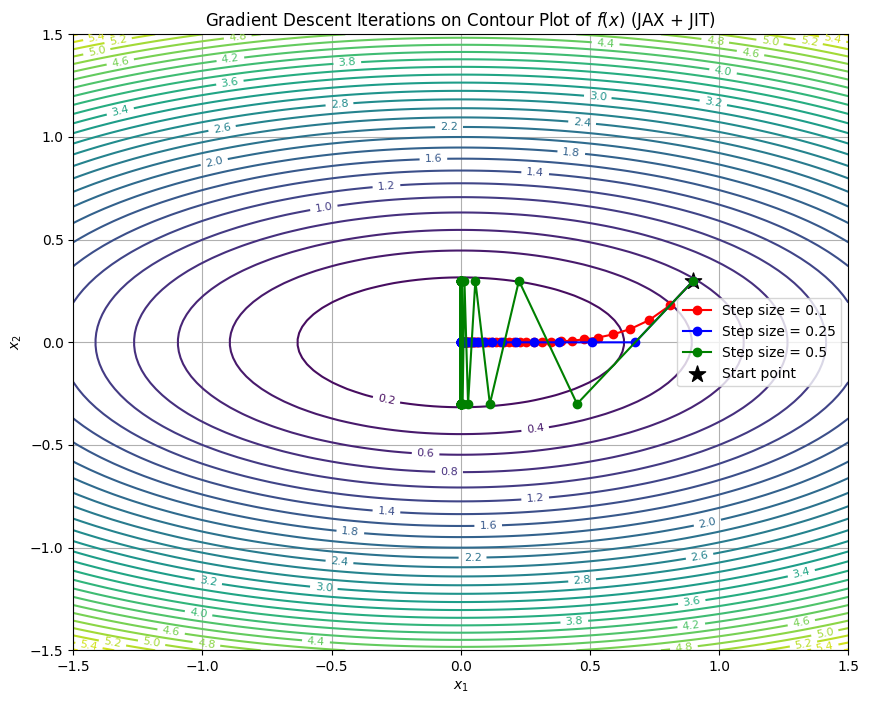

In [ ]:
# Parameters
eta = 4.0
x0 = jnp.array([0.9, 0.3])
max_iter = 50


# Define function and gradient using JAX
def f(x):
    return 0.5 * (x[0] ** 2 + eta * x[1] ** 2)


grad_f = jax.jit(jax.grad(f))


# Gradient Descent with constant step size (using JIT)
@jax.jit
def gd_step(x, tau):
    return x - tau * grad_f(x)


def gradient_descent(x0, tau, max_iter):
    x = x0
    trajectory = [x]
    for _ in range(max_iter):
        x = gd_step(x, tau)
        trajectory.append(x)
    return jnp.stack(trajectory)


# Create contour plot of f
xmin, xmax, Nx = -1.5, 1.5, 100
ymin, ymax, Ny = -1.5, 1.5, 100
x = jnp.linspace(xmin, xmax, Nx)
y = jnp.linspace(ymin, ymax, Ny)
XX, YY = jnp.meshgrid(x, y)
F = 0.5 * (XX**2 + eta * YY**2)

plt.figure(figsize=(10, 8))
contours = plt.contour(XX, YY, F, levels=30, cmap="viridis")
plt.clabel(contours, inline=True, fontsize=8)
plt.title("Gradient Descent Iterations on Contour Plot of $f(x)$ (JAX + JIT)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Different step sizes to test
step_sizes = [0.1, 0.25, 0.5]
colors = ["r", "b", "g"]

for tau, color in zip(step_sizes, colors):
    traj = gradient_descent(x0, tau, max_iter)
    traj_np = jax.device_get(traj)  # Move to CPU numpy for plotting
    plt.plot(
        traj_np[:, 0],
        traj_np[:, 1],
        marker="o",
        color=color,
        label=f"Step size = {tau}",
    )

plt.scatter([x0[0]], [x0[1]], color="k", marker="*", s=150, label="Start point")
plt.legend()
plt.grid(True)
plt.show()


Consider the exact line search method for the dynamic choice of the step size. In this method at each step we choose

$$
\tau_k = \argmin_s f(\mathbf{x}^{(k)} - s\nabla f(\mathbf{x}^{k})) \tag{4}
$$

Compute the explict expression of τk given by the exact line serach method for the function (1).


Step 1: Compute the gradient $\nabla f(\mathbf{x})$:

$$
\nabla f(\mathbf{x}) =
\begin{bmatrix}
x_1 \\
\eta x_2
\end{bmatrix}
$$

Step 2: Define the function along the search direction:

$$
g(s) = f\big(\mathbf{x}^{(k)} - s \nabla f(\mathbf{x}^{(k)})\big)
= \frac{1}{2} \left( (x_1^{(k)} - s x_1^{(k)})^2 + \eta (x_2^{(k)} - s \eta x_2^{(k)})^2 \right)
$$

Simplify:

$$
= \frac{1}{2} \left( (1 - s)^2 (x_1^{(k)})^2 + \eta (1 - s \eta)^2 (x_2^{(k)})^2 \right)
$$

Step 3: Find the minimizing $s$ by setting derivative to zero:

$$
g'(s) = 0
$$

Calculate the derivative:

$$
g'(s) = - (1 - s)(x_1^{(k)})^2 - \eta^2 (1 - s \eta)(x_2^{(k)})^2 = 0
$$

Rewrite:

$$
(1 - s)(x_1^{(k)})^2 + \eta^2 (1 - s \eta)(x_2^{(k)})^2 = 0
$$

Expand:

$$
(x_1^{(k)})^2 - s (x_1^{(k)})^2 + \eta^2 (x_2^{(k)})^2 - s \eta^3 (x_2^{(k)})^2 = 0
$$

Group terms with $s$:

$$
\big( (x_1^{(k)})^2 + \eta^2 (x_2^{(k)})^2 \big) - s \big( (x_1^{(k)})^2 + \eta^3 (x_2^{(k)})^2 \big) = 0
$$

Step 4: Solve for $s$:

$$
\tau_k = s = \frac{(x_1^{(k)})^2 + \eta^2 (x_2^{(k)})^2}{(x_1^{(k)})^2 + \eta^3 (x_2^{(k)})^2}
$$

Final explicit formula for the exact line search step size:

$$
\boxed{
\tau_k = \frac{(x_1^{(k)})^2 + \eta^2 (x_2^{(k)})^2}{(x_1^{(k)})^2 + \eta^3 (x_2^{(k)})^2}
}
$$


Implement the GD method with variable step size using the expression derived at the previous point and apply the method to the minimization of function (1). Display the iterations, on the contour figure.
Comment on the results.


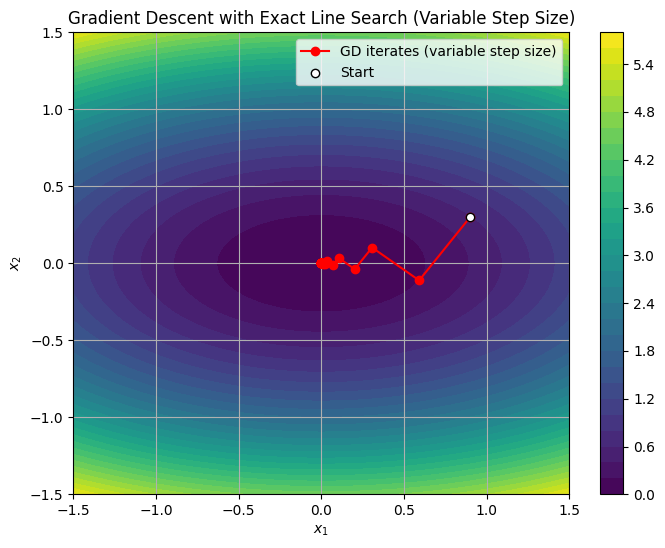

In [ ]:
# Parameters
eta = 4.0
x0 = jnp.array([0.9, 0.3])
max_iter = 50


# Define function and gradient
@jax.jit
def f(x):
    return 0.5 * (x[0] ** 2 + eta * x[1] ** 2)


grad_f = jax.jit(jax.grad(f))


# Exact line search step size tau_k expression
@jax.jit
def exact_step_size(x):
    numerator = x[0] ** 2 + (eta**2) * (x[1] ** 2)
    denominator = x[0] ** 2 + (eta**3) * (x[1] ** 2)
    return numerator / denominator


# Gradient Descent with variable step size
def gd_variable_step(x0, max_iter=50):
    xs = [x0]
    for _ in range(max_iter):
        x = xs[-1]
        grad = grad_f(x)
        tau = exact_step_size(x)
        x_new = x - tau * grad
        xs.append(x_new)
    return jnp.array(xs)


# Run optimization
trajectory = gd_variable_step(x0, max_iter)

# Create contour plot
xmin, xmax = -1.5, 1.5
ymin, ymax = -1.5, 1.5
Nx, Ny = 100, 100

x = jnp.linspace(xmin, xmax, Nx)
y = jnp.linspace(ymin, ymax, Ny)
XX, YY = jnp.meshgrid(x, y)
F = 0.5 * (XX**2 + eta * YY**2)

plt.figure(figsize=(8, 6))
contours = plt.contourf(XX, YY, F, levels=30, cmap="viridis")
plt.colorbar(contours)

# Plot trajectory
plt.plot(
    trajectory[:, 0],
    trajectory[:, 1],
    marker="o",
    color="red",
    label="GD iterates (variable step size)",
)
plt.scatter(x0[0], x0[1], color="white", edgecolors="black", label="Start", zorder=5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Gradient Descent with Exact Line Search (Variable Step Size)")
plt.legend()
plt.grid(True)
plt.show()

The exact line search dynamically adjusts the step size $\tau_k$ at each iteration to ensure optimal progress.

Faster convergence compared to fixed small step sizes.

The iterates trace a smooth path down the elliptical contours, quickly approaching the minimum at $(0,0)$

This approach avoids overshooting or slow convergence issues that fixed step sizes can cause in ill-conditioned problems (where
$\eta$ is large).
